In [2]:
%load_ext autoreload
%autoreload 2

import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import relationship_plots as plot
import mD_vT_relationships as relationships

In [3]:
plt_params = {
    "axes.labelsize": "xx-large",
    "axes.titlesize": "xx-large",
    "xtick.labelsize": "xx-large",
    "ytick.labelsize": "xx-large",
    "legend.title_fontsize": 12,
    "legend.fontsize": 12,
}
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(plt_params)

In [65]:
'''
variables:
    agg_as = aggregate major radius from fit ellipsoid
    agg_bs = aggregate middle radius from fit ellipsoid
    agg_cs = aggregate minor radius from fit ellipsoid
    Aps = area of projected aggregate polygons in x-y plane
    Acs = area of smallest circle fit around projected aggregate in x-y plane
    Vps = volume of aggregate polygons
    Ves = volume of ellipsoid
    Dmaxs = longest axis from vertex to vertex through 3D polygon
'''
# LOAD DATA
# array shapes = [mono phi, mono r, nclusters, ncrystals]
f = open('../instance_files/mD_vT_vars_rand', 'rb')
result_rand = pickle.load(f)
f.close()

f = open('../instance_files/mD_vT_vars_flat', 'rb')
result_flat = pickle.load(f)
f.close()

locals().update(result_flat)

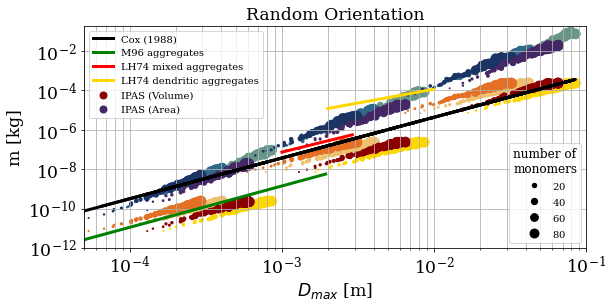

In [45]:
#RANDOM ORIENTATION
#convert dict keys to variables
locals().update(result_rand)

phi_idxs = [0,1,2,3]  
r_idxs = [0,1,2] 
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(2, 1, 1)

p = plot.Plots(ax, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.m_D_plot()
#         self.ax.set_ylim([1e-8, 2e-5])
#         self.ax.set_xlim([1e-4, 1e-2])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys());


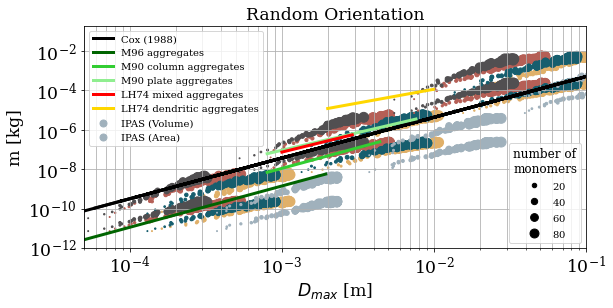

In [150]:
#QH ORIENTATION
#convert dict keys to variables
locals().update(result_flat)

phi_idxs = [0,1,2,3,4]  
r_idxs = [0,1,2] 
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(2, 1, 1)

p = plot.Plots(ax, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.m_D_plot()
#         self.ax.set_ylim([1e-8, 2e-5])
#         self.ax.set_xlim([1e-4, 1e-2])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys());


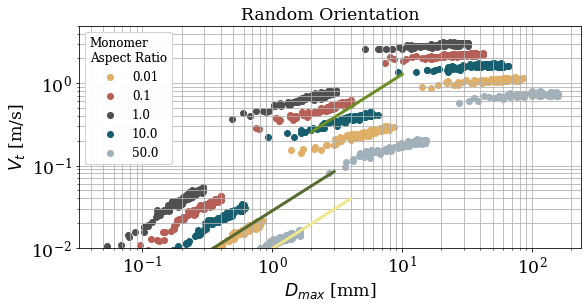

In [252]:
# RANDOM ORIENTATION
# convert dict keys to variables
locals().update(result_rand)

phi_idxs = [0, 1, 2, 3, 4]
r_idxs = [0, 1, 2]
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(2, 1, 1)

p = plot.Plots(ax, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idxs = r_idxs
p.vt_plot()
#         self.ax.set_ylim([1e-8, 2e-5])
#         self.ax.set_xlim([1e-4, 1e-2])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels[45:], handles[45:]))
leg1 = plt.legend(
    by_label.values(),
    by_label.keys(),
    title="Monomer\nAspect Ratio",
)
plt.gca().add_artist(leg1)

# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels[:3], handles[:3]))
# plt.legend(
#     by_label.values(),
#     by_label.keys(),
#     bbox_to_anchor=(-0.18, -0.45, 0.0, 0.2),
#     loc="upper left",
#     ncol=3,
# );

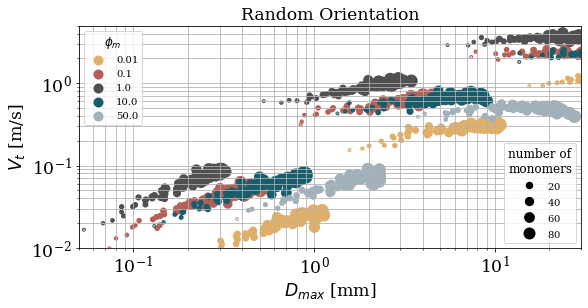

In [151]:
#FLAT ORIENTATION
#convert dict keys to variables
locals().update(result_flat)

phi_idxs = [0,1,2,3,4]  
r_idxs = [0,1,2] 
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(2, 1, 1)

p = plot.Plots(ax, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.vt_plot()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='$\phi_m$');


### Mass calculated using area vs. volume: <br>

## AREA:
<p> first determine if oblate or prolate for each formed agg (out of 300) for all nm (99):<\p><br>
$rho_i = rho_b * Ar$<br>
oblate:<br>
$m = 4/3 * pi * a^2 * c * rho_i$<br>
prolate:<br>
$m = 4/3 * pi * a * c^2 * rho_i$

## VOLUME:
for a given r_m and phi_m:<br>
$rho_i = rho_b*Vr$<br>
no need to find prolate/oblate <br>
$m = 4/3 * pi * a * b * c *rho_i$   [kg] <br>

<p> only finding mode of m after calculating rho_i for each n and nm </p>
<p> converting Aps, Acs, Vps, ,and Ves into [m]</p>
    

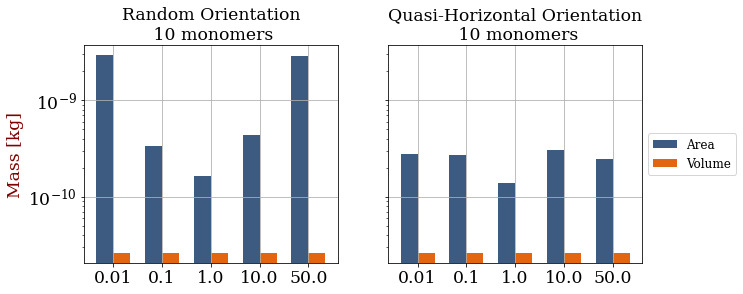

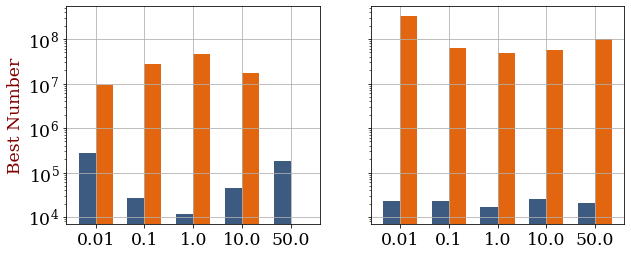

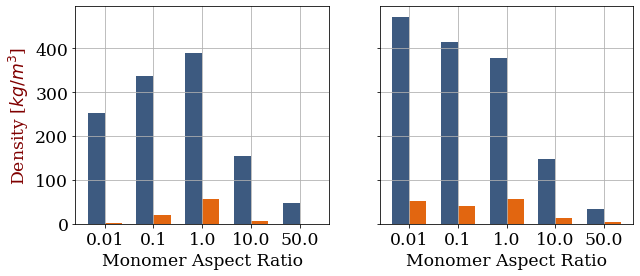

In [152]:
# random ORIENTATION
# convert dict keys to variables
locals().update(result_rand)

phi_idxs = [0, 1, 2, 3, 4]
r_idx = 0
nm = 9  # plot after how many monomers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

p = plot.Plots(ax1, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = r_idx  # index of monomer radius
p.nm = nm  # plot after how many monomers
title = f"Random Orientation\n {nm+1} monomers"
#xlabel = "Monomer Aspect Ratio"
xlabel=""
p.mass_plot(title, xlabel)

# QH ORIENTATION
# convert dict keys to variables
locals().update(result_flat)
p = plot.Plots(ax2, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
title = f"Quasi-Horizontal Orientation\n {nm+1} monomers"
p.r_idx = r_idx  # index of monomer radius
p.nm = nm  # plot after how many monomers
xlabel=""
p.mass_plot(title, xlabel)
ax2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

# convert dict keys to variables
locals().update(result_rand)
phi_idxs = [0, 1, 2, 3, 4]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
p = plot.Plots(ax1, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = r_idx  # index of monomer radius
p.nm = nm  # plot after how many monomers
#title = f"Random Orientation\n {nm+1} monomers"
title=""
xlabel = ""
p.best_number_plot(title, xlabel)

locals().update(result_flat)
#title = f"Quasi-Horizontal Orientation\n {nm+1} monomers"
title=""
xlabel = ""
p = plot.Plots(ax2, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = r_idx  # index of monomer radius
p.nm = nm  # plot after how many monomers
p.best_number_plot(title, xlabel)
#ax2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

# convert dict keys to variables
locals().update(result_rand)
phi_idxs = [0, 1, 2, 3, 4]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
p = plot.Plots(ax1, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = r_idx  # index of monomer radius
p.nm = nm  # plot after how many monomers
#title = f"Random Orientation\n {nm+1} monomers"
title=""
xlabel = "Monomer Aspect Ratio"
p.density_plot(title, xlabel)

locals().update(result_flat)
#title = f"Quasi-Horizontal Orientation\n {nm+1} monomers"
title=""
xlabel = "Monomer Aspect Ratio"
p = plot.Plots(ax2, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = r_idx  # index of monomer radius
p.nm = nm  # plot after how many monomers
p.density_plot(title, xlabel)
#ax2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

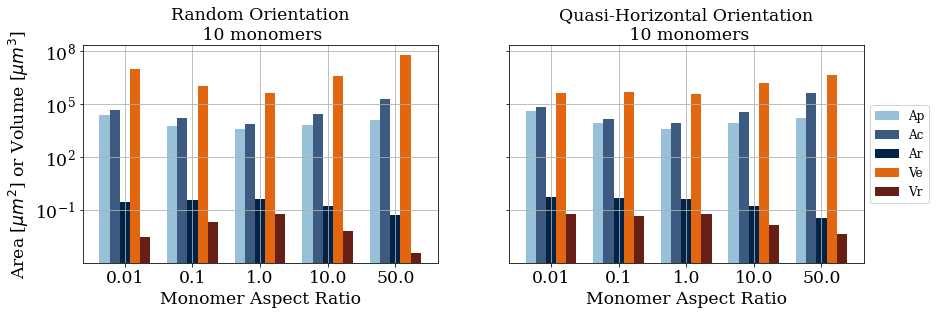

In [134]:
# convert dict keys to variables
locals().update(result_rand)

phi_idxs = [0, 1, 2, 3, 4]
r_idxs = [0]
nm = 9  # plot after how many monomers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4), sharey=True)
p = plot.Plots(ax1, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = 0  # index of monomer radius
p.nm = 9  # plot after how many monomers
title = f"Random Orientation\n {nm+1} monomers"
xlabel = "Monomer Aspect Ratio"
p.area_plot(title, xlabel, nm)

locals().update(result_flat)
title = f"Quasi-Horizontal Orientation\n {nm+1} monomers"
xlabel = "Monomer Aspect Ratio"
p = plot.Plots(ax2, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = 0  # index of monomer radius
p.nm = 9  # plot after how many monomers
p.area_plot(title, xlabel, nm)
ax2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));